In [3]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

### For each of the following questions
- formulate a null and alternative hypothesis (be as specific as you can be)
- then give an example of what the following would look like :
    - true positive: null is false and we reject null
    - true negative: null is true and we accept null
    - type I error (or False Positive): We reject the null but in reality it is true
    - type II errors (or False negative): fail to reject null but it is false

### Has the network latency gone up since we switched internet service providers?

- New Question: Is there an increase in the network latency before and after new internet service providers?

- Null Hypothesis: There is not a significant increase in network latency before and after new internet service providers

- Alt Hypothesis: There is a significant increase in network latency before and after new internet service providers

- True Pos: We say there is a significant increase in network latency before and after new internet service providers and that is correct in reality

- True Neg: We say there is not a significant increase in network latency before and after new internet service providers and that is correct in reality

- Type I error: We say there is a significant increase in network latency before and after new internet service providers but in reality there is not

- Type II error: We say there is not a significant increase in network latency before and after new internet service providers but in reality there is


### Is the website redesign any good?

- New Question: Is there an increase in the conversion rate before and after website redesign?
- Null Hypothesis: There is no change in conversion rate before and after website redesign
- Alt Hypothesis: There is a significant increase in conversion rate before and after website redesign
- True Pos: We say there is a significant increase in conversion rate before and after website redesign and that is correct in reality
- True Neg: We say there is not a significant increase in conversion rate before and after website redesign and that is correct in reality
- Type I error: We say there is a significant increase in conversion rate before and after website redesign but in reality there is not
- Type II error: We say there is not a significant increase in conversion rate before and after website redesign but in reality there is

### Is our television ad driving more sales?
- New Question: Is there an increase in sales after the new tv ad?
- Null Hypothesis: There is not a significant increase in sales before and after new tv ad
- Alt Hypothesis: There is a significant increase in sales before and after new tv ad
- True Pos: We say there is a significant increase in sales before and after new tv ad and that is correct in reality
- True Neg: We say there is not a significant increase in sales before and after new tv ad and that is correct in reality
- Type I error: We say there is a significant increase in sales before and after new tv ad but in reality there is not
- Type II error: We say there is not a significant increase in sales before and after new tv ad but in reality there is

### Questions to ask of Telco data

- Is there a relationship between monthly charges and :
    - tenure
    - gender
    - is_senior_citizen
    - payment_type
    - contract type
    - internet service
    - streaming tv
    - streaming movies
    
    
- Is there a relationship between churn and:
    - tenure
    - gender (Are male customers more likely to churn?)
    - is_senior_citizen (Are senior citizens more likely to churn?)
    - payment_type
    - contract type
    - phone service
    - internet service
    - streaming tv
    - streaming movies
    - dependents
    
    
- Are males more likely to stream tv and movies than females?


- Is there a difference in the length of tenure for men and women?


- Are customers with dependents more likely to have fiber optic internet?


- Are seniors more likely to have month to month contracts?

### Questions to ask of Zillow data

- Is there a relationship between price and:
    - sq footage
    - year built
    - number of stories
    - number of bedrooms
    - number of bathrooms
    - ac type
    - building class type
    - fireplace count
    - garage count
    - garage sq footage
    - heating systems
    - pool size
    - propety zone
    - zip code
    - tax amount
    - building class type
    - architectural style
    - construction type
    
    
    
- Do older properties have higher taxes?



- Is there a relationship between architecutral style and:
    - number of stories
    - ac type
    - zip code
    - year built
    - sq footage 
    - fireplace count
    - number of bedrooms
    - number of bathrooms
    - garage count
    - tax amount 
    - building class type
    - construction type
   

## t - test Exercises

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Are days to sell different for office 1 vs office 2?

$H_{0}$: Mean days to sell for office 1 = Mean days to sell for office 2  
$H_{a}$: Mean days to sell for office 1 != Mean days to sell for office 2 

We can use 2 sample, 2-tailed t-test here

In [4]:
alpha = 0.05

mu1 = 90
sd1 = 15
n1 = 40

mu2 = 100
sd2 = 20
n2 = 50

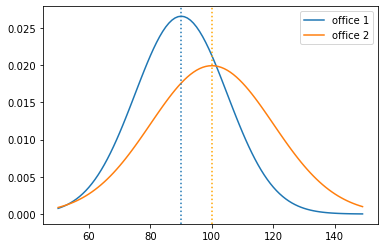

In [5]:
# visualize the distribution

x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')

plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

# The graph below shows that the mean of office 1 is higher than that of office 2. We need to confirm if the difference is 
#statistically significant

In [6]:
t, p = stats.ttest_ind_from_stats(mu1, sd1, n1, 
                                 mu2, sd2, n2, equal_var = False)

t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

negative t stat indicates that avg for office 2 is higher than that of office 1

In [7]:
p < alpha

True

In [8]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Based on the p-value, we have sufficient evidence to conclude that there is a significant difference in mean days to sell for office 1 vs office 2

## Load the mpg dataset and use it to answer the following questions:

In [9]:
df = data('mpg')
df.head()
df.year.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [10]:
# using harmonic mean instead of arithmetic because the units are in mpg
df['avg_eff'] = stats.hmean(df[['cty', 'hwy']], axis =1)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [11]:
cars_08 = df[df.year == 2008].avg_eff
cars_08.head()

3     24.313725
4     24.705882
7     21.600000
10    23.333333
11    22.304348
Name: avg_eff, dtype: float64

In [12]:
cars_99 = df[df.year == 1999].avg_eff
cars_99.head()

1    22.212766
2    24.360000
5    19.809524
6    21.272727
8    21.272727
Name: avg_eff, dtype: float64

**Plot Distribution**

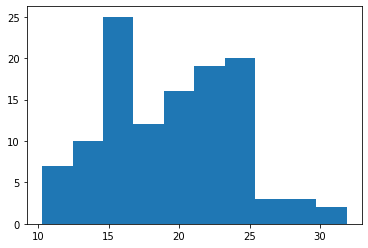

In [13]:
cars_08.hist()
plt.grid(False)

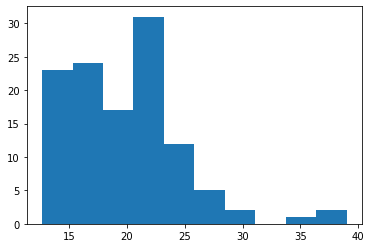

In [14]:
cars_99.hist()
plt.grid(False)

both distributions do not appear to be normally distributed but the sample size is large enough

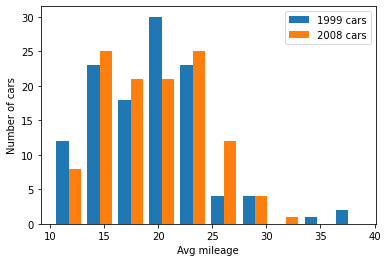

In [15]:
plt.hist([cars_99, cars_08], label = ['1999 cars', '2008 cars'])
plt.xlabel('Avg mileage')
plt.ylabel('Number of cars')
plt.legend()

In [16]:
cars_08.count(), cars_99.count()

(117, 117)

**Hypothesis**

$H_{0}$: Fuel efficiency is the same for 2008 and 1999 vehicles

$H_{a}$: Fuel efficiency is not the same for 2008 and 1999 vehicles

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: ?

In [17]:
# do two samples have similar variances?

cars_08.var(), cars_99.var()

(22.550836772260343, 25.850396545865912)

In [18]:
stats.levene(cars_08, cars_99)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

the variances are not too different from each other so we will assume they meet the equal variances requirement

In [19]:
# use Scipy's independent ttest to find t and p

t, p = stats.ttest_ind(cars_08, cars_99)

t, p, alpha

(-0.3011962975077886, 0.7635345888327115, 0.05)

**Decide**

is p-value less than alpha? 

In [20]:
p < alpha

False

Since the p-value is greater than alpha we fail to reject the null hypothesis. Fuel efficiency for 2008 and 1999 vehicles is the same

### Are compact cars more fuel-efficient than the average car?

In [21]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

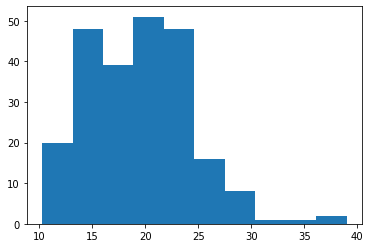

In [22]:
# plot distribution of average fuel efficiency
df.avg_eff.hist() # slightly skewed, not normal dist
plt.grid(False)

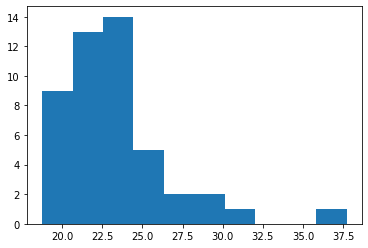

In [23]:
# plot distribution of avg efficiency for compact cars

compact_cars = df[df['class'] == 'compact'].avg_eff
compact_cars.hist() # not normal dist
plt.grid(False)

In [24]:
df['transmission_type'] = np.where(df.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,Auto Transmission
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,Manual Transmission
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,Manual Transmission
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,Auto Transmission
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,Auto Transmission


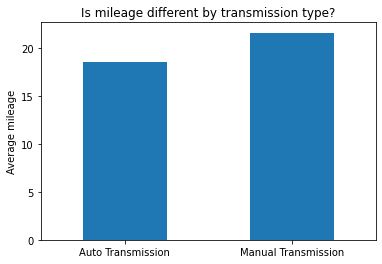

In [25]:
df.groupby('transmission_type').avg_eff.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

plt.show()

**B. Set Hypothesis**

$H_{0}$: Avg fuel efficiency of compact cars = Avg fuel efficiency of all other cars

$H_{a}$: Avg fuel efficiency of compact cars > Avg fuel efficiency of all other cars
    
**C. Set Alpha**


In [26]:
# we decide on 95% cofidence level (alpha = 0.05)
alpha = 0.05

**D. Verify Assumptions**

In [27]:
# How big is sample size for comapct cars?
# If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

df['class'].value_counts()
# we are interested in compact cars

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

**E. Compute test statistic and probability (t-statistic & p-value)**

- do a 1 sample 1 tailed t-test
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0

In [28]:
# overall mean of population
overall_mean = df.avg_eff.mean()

In [29]:
# calculate t and p statistic

t, p = stats.ttest_1samp(compact_cars, overall_mean)

t, p/2, alpha

(7.512360093161354, 7.808833174403864e-10, 0.05)

In [30]:
if (p/2 < alpha) & (t >0):
    print("We reject the null hypothesis")
else: 
    print(" We fail to reject the null hypothesis")

We reject the null hypothesis


Since p/2 is less than alpha and t > 0, we reject the null hypothesis that average fuel efficiency of compact cars is the same as all other cars.


### Do manual cars get better gas mileage than automatic cars?

In [31]:
df.head()
df.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [32]:
auto_cars = df[df['trans'].str.contains('auto')].avg_eff
manual_cars = df[df['trans'].str.contains('manual')].avg_eff

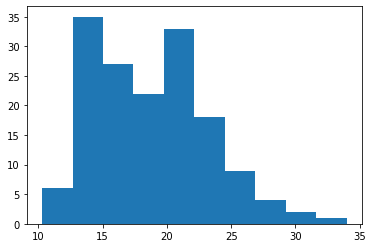

In [33]:
# plot distribution of avg efficiency for automatic cars
auto_cars.hist()
plt.grid(False)

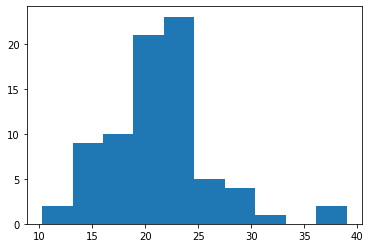

In [34]:
# plot distribution of avg efficiency for manual cars
manual_cars.hist()
plt.grid(False)

In [35]:
auto_cars.count(), manual_cars.count()

(157, 77)

both histograms are not perfectly normally distributed but the sample sizes are large enough

2 sample, 1 tailed t-test

**Set Hypothesis**

$H_{0}$: Avg fuel efficiency of manual cars = Avg fuel efficiency of automatic cars   
$H_{a}$: Avg fuel efficiency of manual cars > Avg fuel efficiency of automatic cars  

    
**Set Alpha**

In [36]:
alpha = 0.05

**Verify Assumptions**

1. Independent Samples. YES! no observations in the auto sample exist in the manual sample. 

2. Normal Distribution - not really but sample size > 30

3. Equal Variances 

In [37]:
auto_cars.var(), manual_cars.var()

(20.428279095002054, 25.665633639828275)

In [38]:
stats.levene(auto_cars, manual_cars)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

variances are not significantly different from each other so we will say they are the same 


**Compute Test Statistic**

In [39]:
t, p = stats.ttest_ind(manual_cars, auto_cars)

t, p/2, alpha

(4.652577547151351, 2.7552323050220026e-06, 0.05)

In [40]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [41]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Since p/2 is less than alpha and t > 0, we reject the null hypothesis that avg fuel efficiency of manual and automatic cars is the same.

# Correlation Exercises

## 1. Use the telco_churn data.  


In [234]:
# load the data set
df = pd.read_csv('Cust_Churn_Telco.csv')

In [235]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


some null values in TotalCharges

### Does tenure correlate with monthly charges?

$H_{0}$: There is no linear correlation between tenure and monthly charges   
$H_{a}$:  There is a linear correlation between tenure and monthly charges

confidence level = 95%
alpha = 0.05

In [ ]:
# fix dtype of total charges
df

In [106]:
# assign x and y

x = df.tenure
y = df.MonthlyCharges

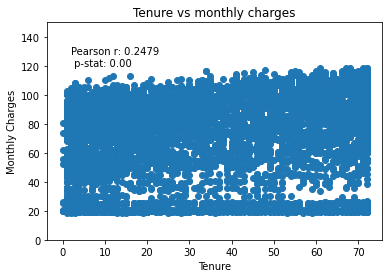

In [107]:
# plot the distribution 

plt.scatter(x, y)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.ylim(0,150)
plt.title('Tenure vs monthly charges')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (2, 120))
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

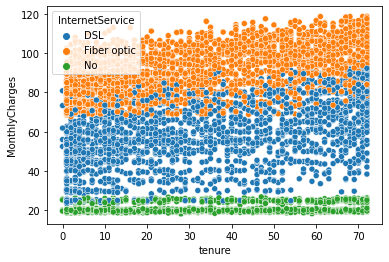

In [108]:
sns.scatterplot(x = 'tenure', y= 'MonthlyCharges', data = df, hue = 'InternetService')

In [109]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

In [110]:
p < alpha

True

Pearson's r is not very high at 24.7% indicating some positive correlation. However, the p-value is less than alpha so we reject the null hypothesis that there is no linear correlation between tenure and monthly charges.

### Does tenure correlate with total charges?

$H_{0}$: There is no linear correlation between tenure and total charges   
$H_{a}$:  There is a linear correlation between tenure and total charges

In [111]:
# remove nulls in total charges column
cleaned = df[df.TotalCharges > 0]
cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [113]:
# assign x and y

x = cleaned.tenure
y = cleaned.TotalCharges

Text(2, 4000, 'Pearson r: 0.8259\n p-stat: 0.00')

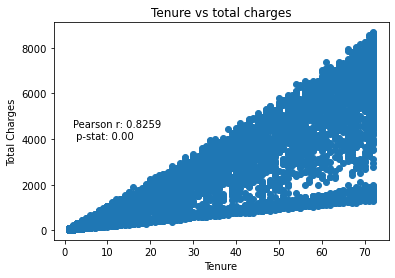

In [114]:
# plot the distribution 

plt.scatter(x, y)
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Tenure vs total charges')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (2, 4000))

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

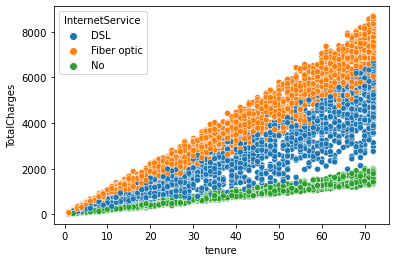

In [115]:
sns.scatterplot(x = 'tenure', y= 'TotalCharges', data = cleaned, hue = 'InternetService')

In [116]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.825880460933202, 0.0)

In [117]:
p < alpha

True

Since p-value is less than alpha, we reject the null hypothesis that there is no linear correlation between tenure and total charges.

## What happens if you control for phone and internet service?

$H_{0}$: There is no linear correlation between tenure and total charges for customers with phone service  
$H_{a}$:  There is a linear correlation between tenure and total charges for customers with phone service

## customers with phone service

In [118]:
with_phone = cleaned[(cleaned['PhoneService'] == 'Yes')].TotalCharges
with_phone.shape[0]

6352

In [119]:
tenure_with_ph = cleaned[(cleaned['PhoneService'] == 'Yes')].tenure
tenure_with_ph.shape[0]

6352

In [120]:
# assign x and y

x = tenure_with_ph
y = with_phone

Text(2, 4000, 'Pearson r: 0.8298\n p-stat: 0.00')

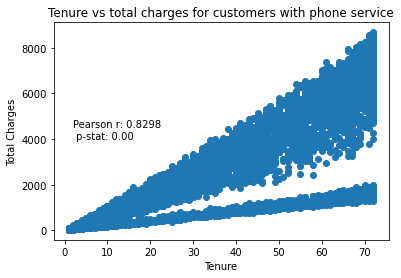

In [121]:
# plot the distribution 

plt.scatter(x, y)
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Tenure vs total charges for customers with phone service')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (2, 4000))

In [122]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.8298393210699408, 0.0)

In [123]:
p < alpha

True

## customers without phone service

In [124]:
no_phone = cleaned[(cleaned['PhoneService'] == 'No')].TotalCharges
no_phone.shape[0]

680

In [125]:
tenure_without_ph = cleaned[(cleaned['PhoneService'] == 'No')].tenure
tenure_without_ph.shape[0]

680

In [126]:
# assign x and y

x = tenure_without_ph
y = no_phone

Text(2, 4000, 'Pearson r: 0.9534\n p-stat: 0.00')

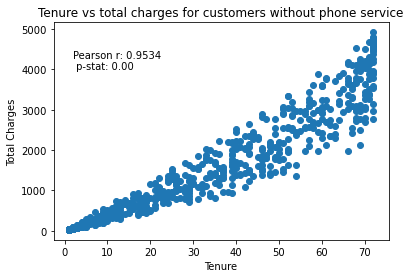

In [127]:
# plot the distribution 

plt.scatter(x, y)
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Tenure vs total charges for customers without phone service')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (2, 4000))

In [237]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

In [238]:
p < alpha

True

pearson's r is higher for customers without phone (95%) than that of customers with phone (83%). Since p-value is lower than alpha of 0.05 we reject the null that there is no correlation between no phone service and total charges.

## controlling for internet

In [239]:
df['internet'] = np.where(df.InternetService.str.contains('No'), 'No', 'Yes')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,internet
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes


In [137]:
cleaned = df[df.TotalCharges > 0]
cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,internet
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes


In [138]:
cleaned.shape[0]

7032

## customers without internet

In [139]:
no_internet_tc = cleaned[(cleaned['internet'] == 'No')].TotalCharges
no_internet_tc.shape[0]

1520

In [140]:
no_internet_tenure = cleaned[(cleaned['internet'] == 'No')].tenure
no_internet_tenure.shape[0]

1520

In [141]:
# assign x and y

x = no_internet_tenure
y = no_internet_tc

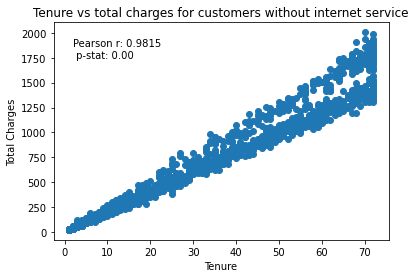

In [145]:
# plot the distribution 

plt.scatter(x, y)
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Tenure vs total charges for customers without internet service')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (2, 1750))
plt.show()

In [146]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.9814648859044286, 0.0)

In [147]:
p < alpha

True

## customers with internet

In [148]:
internet_tc = cleaned[(cleaned['internet'] == 'Yes')].TotalCharges
internet_tc.shape[0]

5512

In [149]:
internet_tenure = cleaned[(cleaned['internet'] == 'Yes')].tenure
internet_tenure.shape[0]

5512

In [151]:
# assign x and y

x = internet_tenure
y = internet_tc

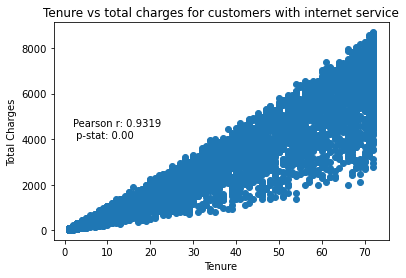

In [153]:
# plot the distribution 

plt.scatter(x, y)
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Tenure vs total charges for customers with internet service')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (2, 4050))
plt.show()

In [154]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.9319346187418097, 0.0)

In [155]:
p < alpha

True

Pearson's r is higher for total charges vs tenure for customers without internet (98%) than that for customers with internet (93%). The p-value is lower than alpha in both cases so we reject the null hypothesis that there is no linear correlation between total charges and tenure.

# 2. Use the employees database.

In [161]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [176]:
query = """
SELECT * , datediff(now(), e.hire_date) AS 'time_at_job'
FROM employees e
JOIN salaries s USING (emp_no)
JOIN titles t USING (emp_no)
WHERE s.to_date > now();
"""

e_df = pd.read_sql(query, get_db_url('employees'))

In [178]:
e_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,time_at_job
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,12738
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,12955
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,12675
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12580
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12580


## Is there a relationship between how long an employee has been with the company and their salary?

𝐻0 : There is no linear correlation between time at job and salary

𝐻𝑎 : There is a linear correlation between time at job and salary

In [240]:
# assign x and y

x = e_df.time_at_job
y = e_df.salary

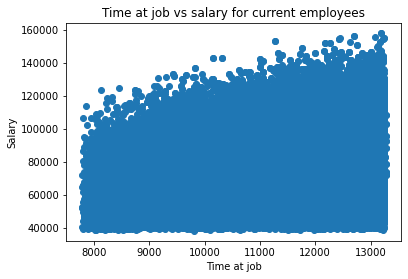

In [241]:
# plot the distribution 

plt.scatter(x, y)
plt.xlabel('Time at job')
plt.ylabel('Salary')
plt.title('Time at job vs salary for current employees')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (8000, 15000))
plt.show()

<AxesSubplot:xlabel='time_at_job', ylabel='salary'>

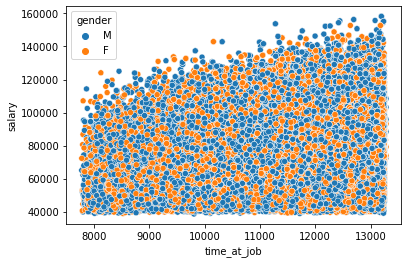

In [242]:
sns.scatterplot(x = 'time_at_job', y = 'salary', data = e_df, hue = 'gender')

In [243]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.30728190932146743, 0.0)

In [244]:
p < alpha

True

Since p-value is less than alpha we reject the nullhypothesis. Pearson's r of 30% indicates some positive correlation between time at job and salary.

## Is there a relationship between how long an employee has been with the company and the number of titles they have had?

𝐻0 : There is no linear correlation between time at job and number of titles held

𝐻𝑎 : There is a linear correlation between time at job and number of titles held


In [204]:
num_titles = e_df.groupby('emp_no').count()[['title']].rename(columns={'title': 'title_count'})
type(num_titles)

pandas.core.frame.DataFrame

In [205]:
e_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,time_at_job
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,12738
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,12955
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,12675
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12580
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12580


In [206]:
e_t_merged = pd.merge(e_df, num_titles, how = 'left', on = 'emp_no')

In [207]:
e_t_merged.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,time_at_job,title_count
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,12738,1
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,12955,1
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,12675,1
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12580,2
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12580,2


In [208]:
# assign x and y

x = e_t_merged.time_at_job
y = e_t_merged.title_count

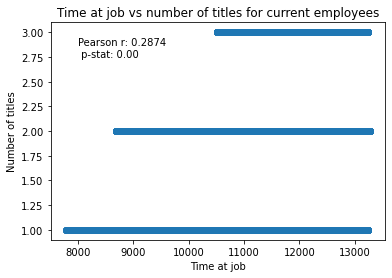

In [213]:
# plot the distribution 

plt.scatter(x, y)
plt.xlabel('Time at job')
plt.ylabel('Number of titles')
plt.title('Time at job vs number of titles for current employees')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (8000, 2.75))
plt.show()

In [214]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.28740043662280135, 0.0)

In [215]:
p < alpha

True

# 3. Use the sleepstudy data

In [216]:
s_df = data('sleepstudy')

In [217]:
s_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [219]:
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [220]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


## Is there a relationship between days and reaction time?

𝐻0 : There is no linear correlation between days of sleep deprivation and average reaction times

𝐻𝑎 : There is a linear correlation between days of sleep deprivation and average reaction times


In [231]:
# assign x and y

x = s_df.Days
y = s_df.Reaction

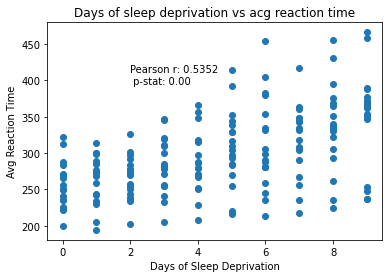

In [232]:
# plot the distribution 

plt.scatter(x, y)
plt.xlabel('Days of Sleep Deprivation')
plt.ylabel('Avg Reaction Time')
plt.title('Days of sleep deprivation vs acg reaction time')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (2,395))
plt.show()

In [226]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

In [227]:
p < alpha

True

pearson's r of 54% indicates a positive linear correlation. Since the p-value is less than alpha we reject the null hypothesis that there is no linear correlation between days of sleep deprivation and average reaction time.